In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

plt.style.use('dark_background')        # seaborn / ggplot
T, F = True, False

# pytorch

## tensor

In [11]:
# torch.(Float)Tensor( 어레이/*size )         # float32
# torch.LongTensor                          # int64
# torch.ByteTensor                          # uint8

t = torch.Tensor(3, 2)
print(t)

t.float(), t.long(), t.byte()

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


(tensor([[0., 0.],
         [0., 0.],
         [0., 0.]]),
 tensor([[0, 0],
         [0, 0],
         [0, 0]]),
 tensor([[0, 0],
         [0, 0],
         [0, 0]], dtype=torch.uint8))

In [9]:
a = np.array([[1, 2], [3, 4]])      # int64
print(a.dtype)

t = torch.from_numpy(a)
print(t.dtype)

b = t.numpy()
print(b.dtype, b)

int64
torch.int64
int64 [[1 2]
 [3 4]]


In [13]:
t.dim(), t.size(), t.shape

(2, torch.Size([3, 2]), torch.Size([3, 2]))

In [ ]:
# torch.ones(*size)     # float32
# torch.zeros(*size)    # float32

In [14]:
# reducing dim

t = torch.Tensor([[1, 2], [3, 4]])

t.sum(), t.mean()                   # scalar tensor

(tensor(10.), tensor(2.5000))

In [15]:
t.sum(dim=0), t.sum(dim=-1)         # reducing dim 지정

(tensor([4., 6.]), tensor([3., 7.]))

In [19]:
# 텐서.index_select(dim, index)

t = torch.Tensor([[[1, 1], [2, 2]],
                  [[3, 3], [4, 4]],
                  [[5, 5], [6, 6]]])

idx = torch.LongTensor([2, 1])
t.index_select(dim=0, index=idx)

tensor([[[5., 5.],
         [6., 6.]],

        [[3., 3.],
         [4., 4.]]])

In [20]:
t[idx]

tensor([[[5., 5.],
         [6., 6.]],

        [[3., 3.],
         [4., 4.]]])

In [25]:
# torch.randperm(n, .., dtype=torch.int64)

torch.randperm(10)

tensor([7, 5, 1, 8, 3, 9, 2, 6, 0, 4])

In [28]:
# 텐서.argmax(dim, keepdim=F)

t = torch.randperm(3**3).reshape(3, 3, -1)

t.size(), t, t.argmax(-1)       # keepdim=F이면 차원 하나 reduce

(torch.Size([3, 3, 3]),
 tensor([[[17, 10, 13],
          [24,  3, 22],
          [15,  4, 18]],
 
         [[ 0,  6,  5],
          [20,  1, 23],
          [11,  2, 14]],
 
         [[26,  9, 12],
          [ 8, 16, 25],
          [19, 21,  7]]]),
 tensor([[0, 0, 2],
         [1, 2, 2],
         [0, 2, 1]]))

In [ ]:
# 텐서.expand(*size)
# torch.topk(텐서, k, dim, largest=T, sorted=T, ..)
# 텐서.masked_fill(마스크, value)

## split & chunk

In [17]:
# 텐서.split(나눈 텐서 크기, dim=0)

t = torch.Tensor(10, 4)
t.split(4)

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.]]))

In [18]:
# 텐서.chunk(갯수, dim=0)

t.chunk(3)

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.]]))

## concat & stack

In [22]:
# torch.cat([tensors], dim=0)

x = torch.Tensor([[1,2,3], [4,5,6], [7,8,9]])
y = torch.Tensor([[10,11,12], [13,14,15], [16,17,18]])

torch.cat([x, y]), torch.cat([x, y], dim=-1)

(tensor([[ 1.,  2.,  3.],
         [ 4.,  5.,  6.],
         [ 7.,  8.,  9.],
         [10., 11., 12.],
         [13., 14., 15.],
         [16., 17., 18.]]),
 tensor([[ 1.,  2.,  3., 10., 11., 12.],
         [ 4.,  5.,  6., 13., 14., 15.],
         [ 7.,  8.,  9., 16., 17., 18.]]))

In [24]:
# torch.stack([tensors], dim=0)

torch.stack([x, y]), torch.stack([x, y], dim=-1)

(tensor([[[ 1.,  2.,  3.],
          [ 4.,  5.,  6.],
          [ 7.,  8.,  9.]],
 
         [[10., 11., 12.],
          [13., 14., 15.],
          [16., 17., 18.]]]),
 tensor([[[ 1., 10.],
          [ 2., 11.],
          [ 3., 12.]],
 
         [[ 4., 13.],
          [ 5., 14.],
          [ 6., 15.]],
 
         [[ 7., 16.],
          [ 8., 17.],
          [ 9., 18.]]]))

# Regression

## California housing

In [10]:
import sklearn
from sklearn.datasets import fetch_california_housing

ds = fetch_california_housing()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df['Target'] = ds.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


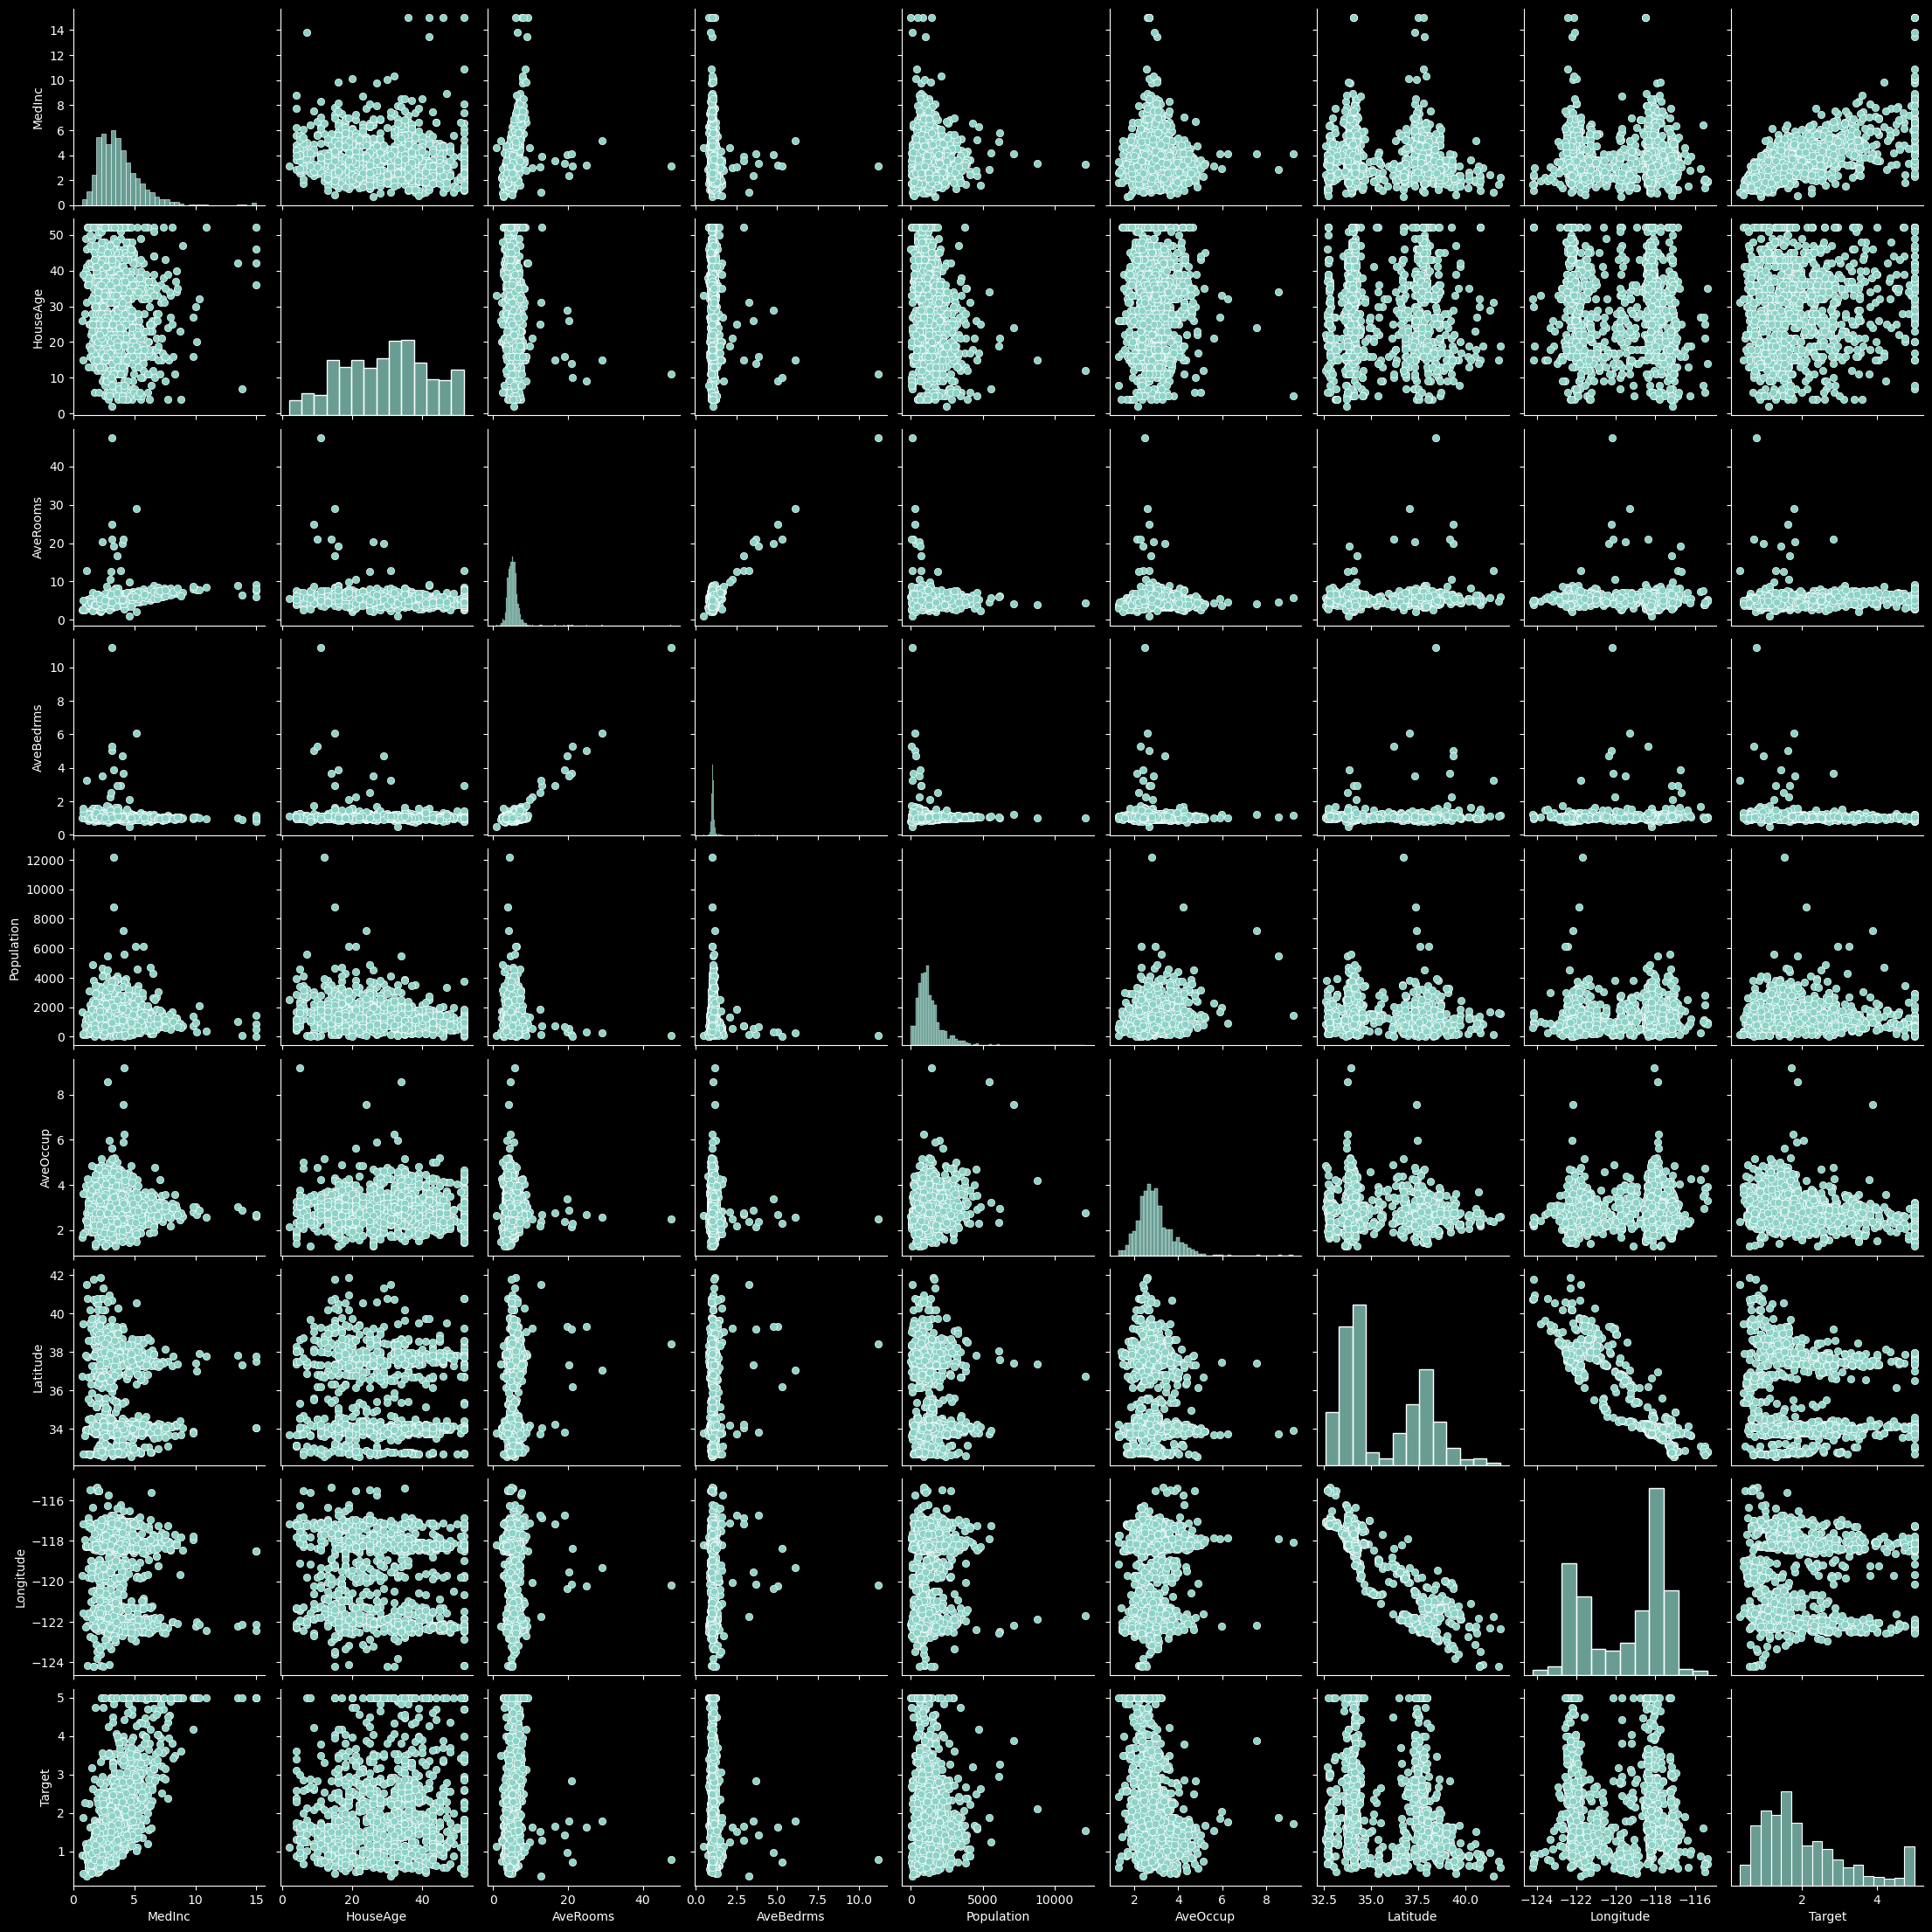

In [11]:
sns.pairplot(df.sample(1000));

Original data shape: (20640, 8), (20640,)
Trn: torch.Size([12384, 8]), torch.Size([12384, 1])
Val: torch.Size([4128, 8]), torch.Size([4128, 1])
Tst: torch.Size([4128, 8]), torch.Size([4128, 1])

model: Sequential(
  (0): Linear(in_features=8, out_features=6, bias=True)
  (1): ReLU()
  (2): Linear(in_features=6, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=4, bias=True)
  (5): ReLU()
  (6): Linear(in_features=4, out_features=3, bias=True)
  (7): ReLU()
  (8): Linear(in_features=3, out_features=1, bias=True)
)
Epoch  200: TrnLoss 3.2097e-01, ValLoss 3.1290e-01, MinLoss 3.1186e-01 (12s)
Epoch  400: TrnLoss 2.9833e-01, ValLoss 2.9791e-01, MinLoss 2.9777e-01 (24s)
Epoch  600: TrnLoss 2.9459e-01, ValLoss 2.9967e-01, MinLoss 2.9430e-01 (35s)
Epoch  800: TrnLoss 2.9192e-01, ValLoss 2.9351e-01, MinLoss 2.9275e-01 (47s)
Epoch 1000: TrnLoss 2.9399e-01, ValLoss 3.0016e-01, MinLoss 2.9146e-01 (59s)
Epoch 1200: TrnLoss 2.9249e-01, ValLoss 2.9264e-01, MinLoss 2.8

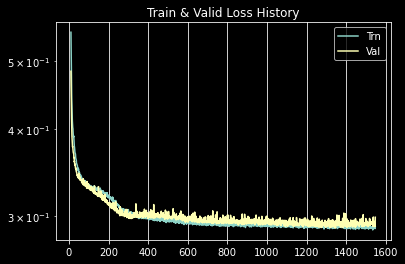

TestLoss 3.1961e-01


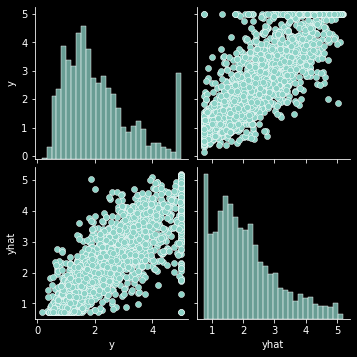

In [43]:
from types import SimpleNamespace
from data import getCaliforniaHousing, get_dataloaders, T, F
from model import linear_model
from utils import Regressor

cf = SimpleNamespace(n_epoch=3000, n_print=200, early_stop=200, plot_from=10, 
                     b_size=256, leaky=F)
Xtrn, Xval, Xtst, ytrn, yval, ytst = getCaliforniaHousing()
trnloader, valloader, tstloader = get_dataloaders(Xtrn, Xval, Xtst, ytrn, yval, ytst, cf.b_size)

model = linear_model(Xtrn.size(-1), 1, (6,5,4,3), leaky=cf.leaky)

regressor = Regressor(model)
regressor.run(trnloader, valloader, cf.n_epoch, cf.n_print, cf.early_stop, cf.plot_from);
regressor.test(tstloader)

# Classification

## Wisconsin Cancer

In [19]:
from sklearn.datasets import load_breast_cancer

ds = load_breast_cancer()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df['Class'] = ds.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Original data shape: (569, 30), (569,)
Trn: torch.Size([341, 30]), torch.Size([341, 1])
Val: torch.Size([114, 30]), torch.Size([114, 1])
Tst: torch.Size([114, 30]), torch.Size([114, 1])

model: Sequential(
  (0): Linear(in_features=30, out_features=25, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=25, out_features=20, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=20, out_features=15, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=15, out_features=10, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=10, out_features=5, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=5, out_features=1, bias=True)
)
Epoch  100: TrnLoss 2.343e-02, ValLoss 5.172e-02, MinLoss 4.311e-02, TrnAcc 0.994, ValAcc 0.982 (0s)
Epoch  200: TrnLoss 2.218e-03, ValLoss 1.730e-01, MinLoss 4.311e-02, TrnAcc 1.000, ValAcc 0.974 (0s)

Epoch  265: No improvement during last 200 epochs

Ep

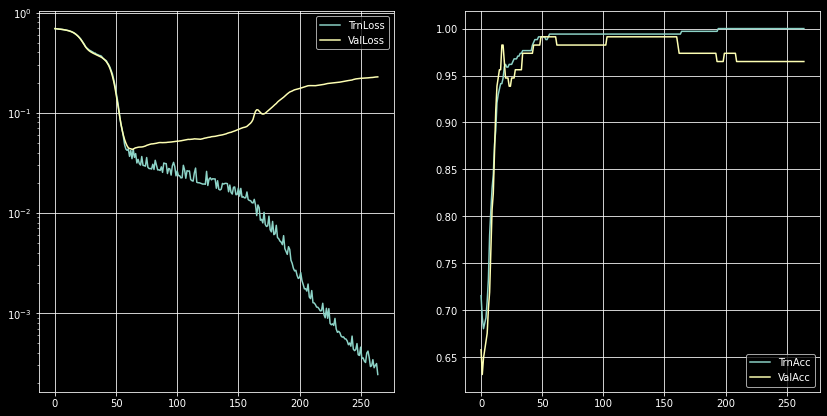

TestLoss 1.0885e-01, TestAccuracy 0.974


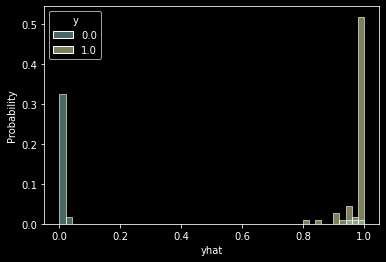

In [76]:
from types import SimpleNamespace
from data import getWisconsinCancer, get_dataloaders
from model import linear_model
from utils import Classifier

cf = SimpleNamespace(b_size=128, n_epoch=1000, n_print=100, early_stop=200)
Xtrn, Xval, Xtst, ytrn, yval, ytst = getWisconsinCancer()
trnloader, valloader, tstloader = get_dataloaders(Xtrn, Xval, Xtst, ytrn, yval, ytst, cf.b_size)

model = linear_model(Xtrn.size(-1), 1, (25, 20, 15, 10, 5), leaky=T)

classifier = Classifier(model, binary=T)
classifier.run(trnloader, valloader, cf.n_epoch, cf.n_print, cf.early_stop)
classifier.test(tstloader)

## MNIST

           X.shape              X[0].max()         y.shape         y.max()   
trn torch.Size([48000, 28, 28]) tensor(1.) torch.Size([48000]) tensor(9)
val torch.Size([12000, 28, 28]) tensor(1.) torch.Size([12000]) tensor(9)
tst torch.Size([10000, 28, 28]) tensor(1.) torch.Size([10000]) tensor(9)


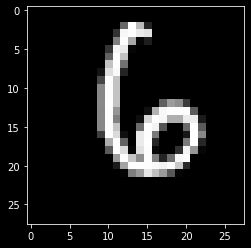

In [62]:
from data import plot, getMNIST

Xtrn, Xval, Xtst, ytrn, yval, ytst = getMNIST()
plot(Xtrn[0])

           X.shape              X[0].max()         y.shape         y.max()   
trn torch.Size([48000, 784]) tensor(1.) torch.Size([48000, 1]) tensor(9)
val torch.Size([12000, 784]) tensor(1.) torch.Size([12000, 1]) tensor(9)
tst torch.Size([10000, 784]) tensor(1.) torch.Size([10000, 1]) tensor(9)

model: Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Linear(in_features=500, out_features=400, bias=True)
  (4): LeakyReLU(negative_slope=0.01)
  (5): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Linear(in_features=400, out_features=300, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): Linear(in_features=300, out_features=200, bias=True)
  (10): LeakyReLU(negative_slope=0.01)
  (11): BatchNorm1d(200, e

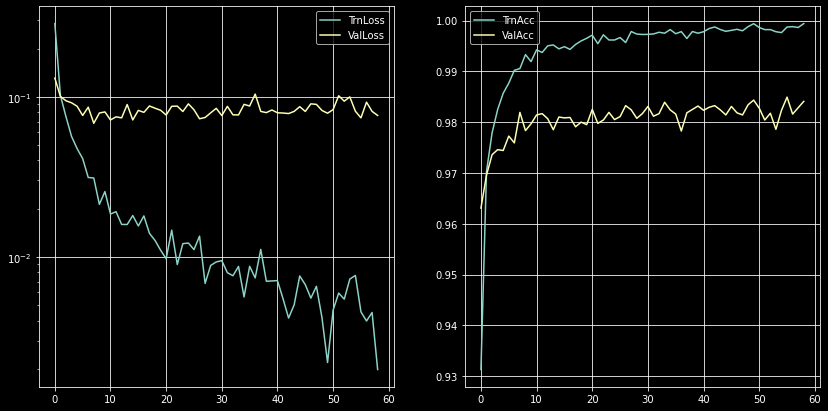

TestLoss 6.5112e-02, TestAccuracy 0.980
Confusion Matrix: index(true) Vs. columns(pred)


,0,1,2,3,4,5,6,7,8,9
0,971,1,1,1,0,0,4,0,1,1
1,0,1131,0,1,0,1,1,0,1,0
2,4,1,1007,7,2,0,1,2,7,1
3,0,0,3,994,0,4,0,3,2,4
4,1,0,4,0,960,0,3,2,2,10
5,2,0,0,15,0,865,3,2,3,2
6,6,3,3,1,2,5,936,0,2,0
7,2,4,7,2,2,0,0,997,7,7
8,2,0,2,5,1,1,0,0,961,2
9,1,1,0,8,12,5,0,3,2,977


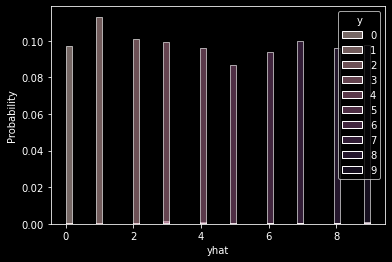

In [79]:
# linear model
from types import SimpleNamespace
from data import getMNIST, get_dataloaders
from model import linear_model, T, F
from utils import Classifier

cf = SimpleNamespace(bsize=256, n_epoch=1000, n_print=10, early_stop=50)

Xtrn, Xval, Xtst, ytrn, yval, ytst = getMNIST(flatten=T)
trnloader, valloader, tstloader = get_dataloaders(Xtrn, Xval, Xtst, ytrn, yval, ytst, cf.bsize)
model = linear_model(Xtrn.size(-1), 10, (500, 400, 300, 200, 100, 50), leaky=T, batchnorm=T, logsoftmax=T)

classifier = Classifier(model)
classifier.run(trnloader, valloader, cf.n_epoch, cf.n_print, cf.early_stop)
classifier.test(tstloader)

In [4]:
from torch import nn, optim
from data import get_loaders
from model import conv_classifier
from utils import Classifier

trnloader, valloader, tstloader = get_loaders(Xtrn.unsqueeze(1), ytrn, Xtst.unsqueeze(1), ytst)
in_shape = (1,) + tuple(Xtrn.shape[1:])
n_class = 10
model = conv_classifier(in_shape, n_class)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
clf = Classifier(model, optimizer, criterion)
clf.run(trnloader, valloader, 100, 50)

  0%|          | 0/100 [00:36<?, ?it/s]


KeyboardInterrupt: 